In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os
import scipy

import matplotlib.pyplot as plt

In [2]:
# datapath = '/media/birniece/Extreme SSD/HydraFrac/SandBox_DAS_data/Finished_Processed data_5kHz to 10 kHz Chirp/Processed data'
datapath = '/home/birniece/Documents/data/ANPERC_Lab/DAS_ChirpTests/Finished_Processed data_5kHz to 10kHz Chirp__20240109/Processed data'
# datapath = '/home/birniece/Documents/data/ANPERC_Lab/DAS_ChirpTests/Finished_Processed data_10kHz sinewave_20240109/Processed data'

In [3]:
def DAS_to_2D(origdata):
    print(origdata.shape)
    data_3D = origdata.reshape([origdata.shape[0],origdata.shape[1]//3,3])
    data_3D = data_3D.transpose([2,0,1])
    data_2D = data_3D.reshape([3,data_3D.shape[1]*data_3D.shape[2]])
    return data_2D

In [4]:
def DAS_to_1D(origdata):
    print(origdata.shape)
    data_1D = origdata.T.reshape([origdata.shape[0]*origdata.shape[1]])
    return data_1D

In [5]:
w1_data = DAS_to_1D(np.loadtxt(os.path.join(datapath,'Wrap_1_time.csv'), delimiter=','))
w2_data = DAS_to_1D(np.loadtxt(os.path.join(datapath,'Wrap_2_time.csv'), delimiter=','))
w3_data = DAS_to_1D(np.loadtxt(os.path.join(datapath,'Wrap_3_time.csv'), delimiter=','))

(61041, 411)
(61041, 411)
(61041, 411)


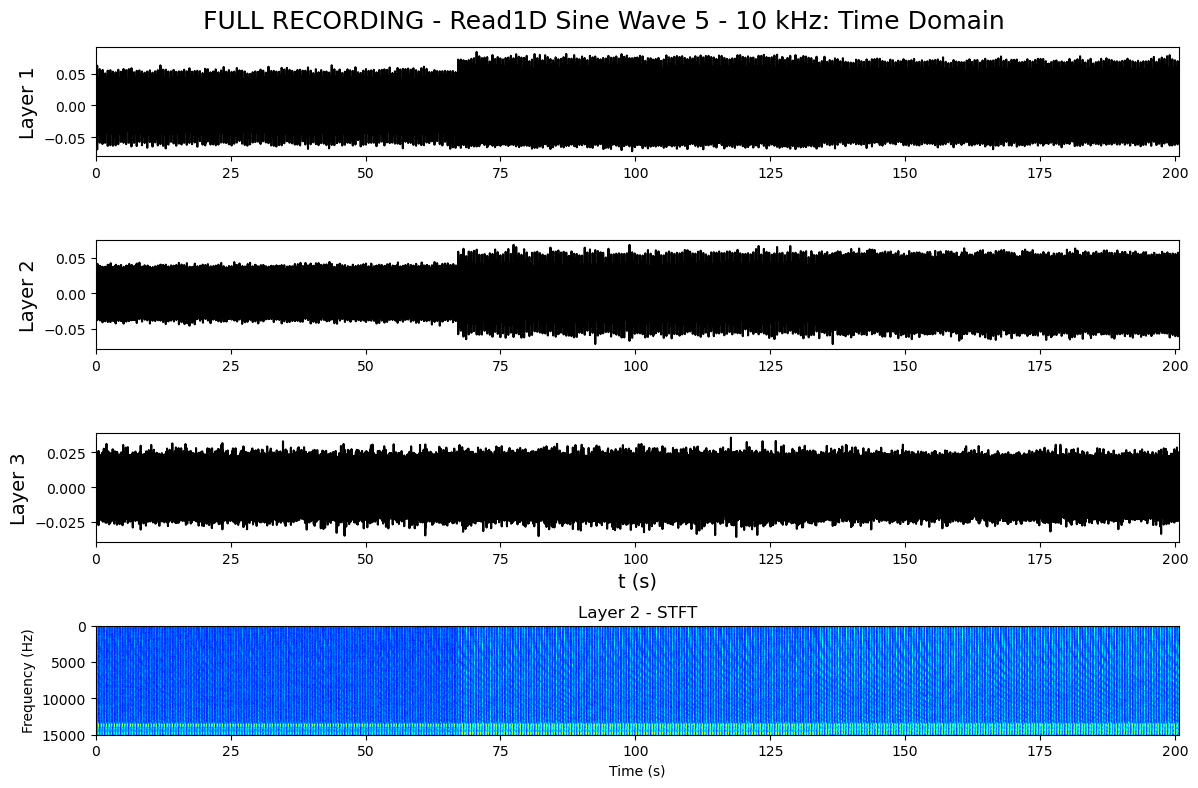

In [6]:
fs = 125000
t = np.arange(len(w1_data))*(1/fs)
f,t_stft,stft = scipy.signal.stft(w2_data, 
                             fs=fs, 
                             nperseg=2501)

fig,axs = plt.subplots(4,1,figsize=[12,8])

axs[0].plot(t,w1_data, 'k')
axs[1].plot(t,w2_data, 'k')
axs[2].plot(t,w3_data, 'k')

axs[0].set_ylabel('Layer 1',fontsize=14)
axs[1].set_ylabel('Layer 2',fontsize=14)
axs[2].set_ylabel('Layer 3',fontsize=14)
axs[2].set_xlabel('t (s)',fontsize=14)
for ax in axs[:-1]: ax.set_xlim([0,max(t)])

axs[3].imshow((abs(stft)), vmax=5e-4, aspect='auto', cmap='jet', extent=[t_stft[0],t_stft[-1],f[-1],f[0]])
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Frequency (Hz)')
axs[3].set_ylim([15000,0])
axs[3].set_title('Layer 2 - STFT')

plt.suptitle('FULL RECORDING - Read1D Sine Wave 5 - 10 kHz: Time Domain',fontsize=18)
plt.tight_layout()
# plt.savefig('./Figures/ChirpTest_Read1D.png')

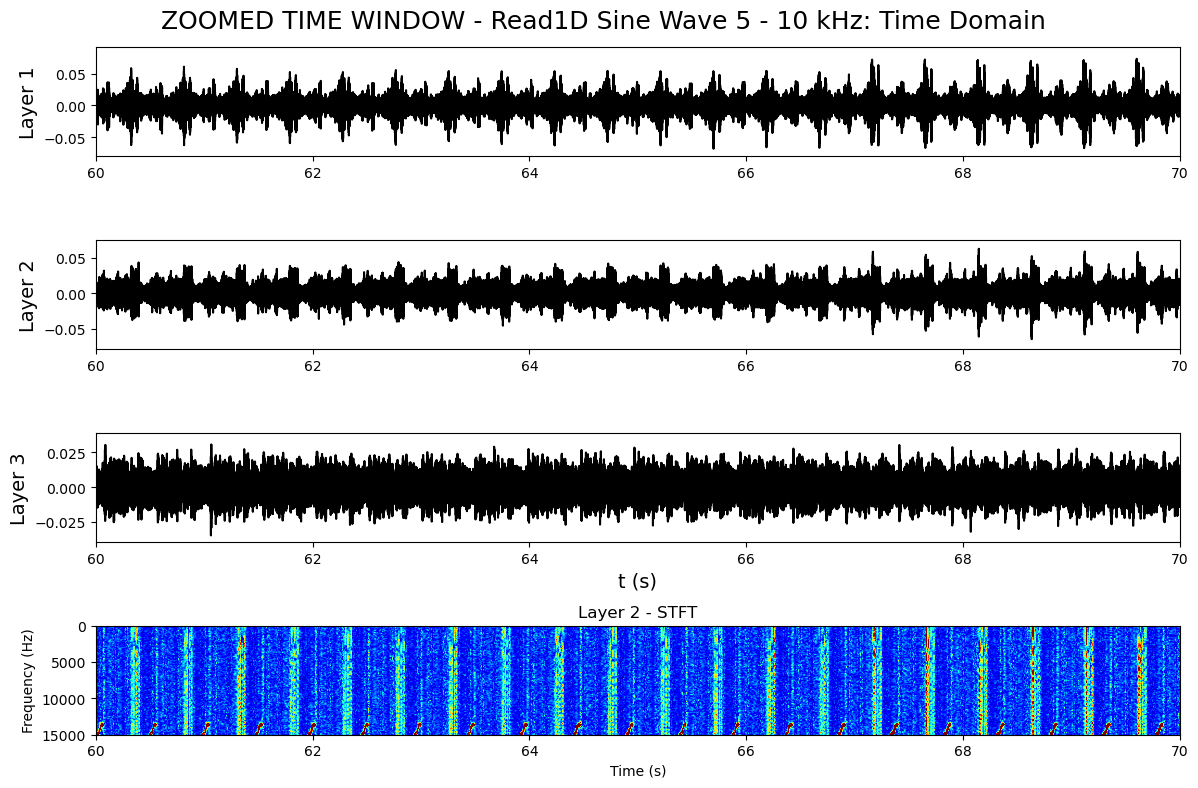

In [8]:
fs = 125000
t = np.arange(len(w1_data))*(1/fs)
f,t_stft,stft = scipy.signal.stft(w2_data, 
                             fs=fs, 
                             nperseg=2501)

fig,axs = plt.subplots(4,1,figsize=[12,8])

axs[0].plot(t,w1_data, 'k')
axs[1].plot(t,w2_data, 'k')
axs[2].plot(t,w3_data, 'k')

axs[0].set_ylabel('Layer 1',fontsize=14)
axs[1].set_ylabel('Layer 2',fontsize=14)
axs[2].set_ylabel('Layer 3',fontsize=14)
axs[2].set_xlabel('t (s)',fontsize=14)

axs[3].imshow((abs(stft)), vmax=5e-4, aspect='auto', cmap='jet', extent=[t_stft[0],t_stft[-1],f[-1],f[0]])
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Frequency (Hz)')
axs[3].set_title('Layer 2 - STFT')
axs[3].set_ylim([15000,0])
for ax in axs: ax.set_xlim([60,70])
    
plt.suptitle('ZOOMED TIME WINDOW - Read1D Sine Wave 5 - 10 kHz: Time Domain',fontsize=18)
plt.tight_layout()


# LOAD WAVELET

In [8]:
fs = 125000

In [9]:
chirp_file = '/home/birniece/Documents/data/ANPERC_Lab/DAS_ChirpTests/Chirp_5kHz_to_10kHz.wav'
# '/home/birniece/Downloads/5kHz to 10kHz Chirp.wav'

In [10]:
from scipy.io import wavfile
samplerate, ch_chirp = wavfile.read(chirp_file)

In [11]:
ch_chirp.shape

(2646000,)

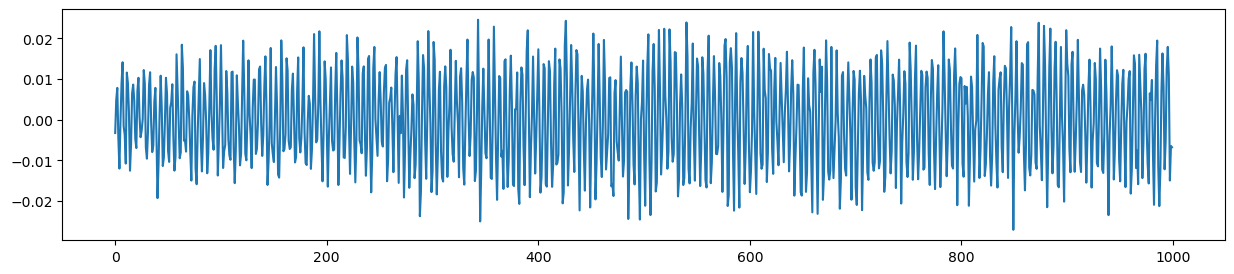

In [12]:
fig,ax = plt.subplots(1,1, figsize=[15,3])
ax.plot(w1_data[:1000])

In [13]:
# Chirp Params
dt = 1/fs
nf = 0.5*fs
nt = 60/dt # time steps
t_axis = np.arange(0,nt*dt,dt)

ch_fs = 44100
ch_dt = 1/ch_fs

f0 = 5000
f1 = 10000
t1 = t_axis[-1]

In [14]:
# Chun Hong's 
ch_autocorr = scipy.signal.correlate(ch_chirp,ch_chirp)
ch_t_axis = np.arange(0,len(ch_chirp)*ch_dt,ch_dt)

# Mine
chirp = scipy.signal.chirp(t_axis,f0,t1,f1)
autocorr = scipy.signal.correlate(chirp,chirp)

Text(0.5, 0.98, '5 - 10 kHz Linear Sweep')

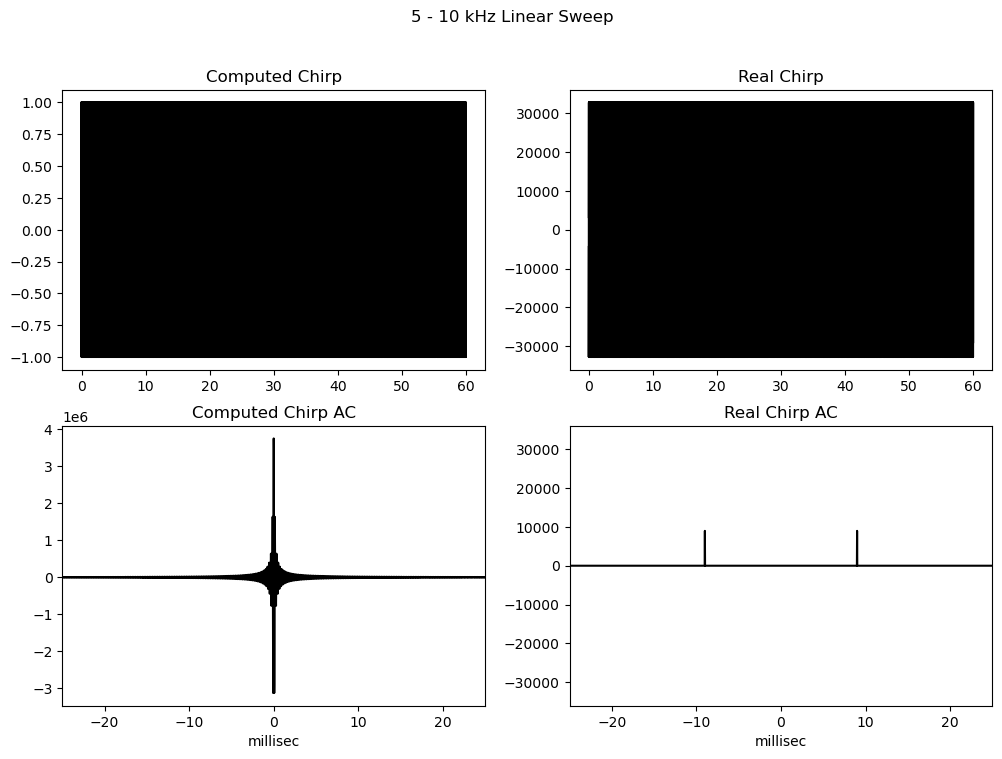

In [15]:
fig,axs = plt.subplots(2,2,figsize=[12,8])

# My chirp
axs[0,0].plot(t_axis, chirp,'k')
axs[1,0].plot(1e3 * np.hstack([-1*np.flipud(t_axis[1:]),t_axis]),autocorr,'k')
axs[1,0].set_xlim([-25,25])
axs[1,0].set_xlabel('millisec')

# Chunhongs chirp
axs[0,1].plot(ch_t_axis, ch_chirp,'k')
axs[1,1].plot(1e3 * np.hstack([-1*np.flipud(ch_t_axis[1:]),ch_t_axis]),ch_autocorr,'k')
axs[1,1].set_xlim([-25,25])
axs[1,1].set_xlabel('millisec')
axs[0,0].set_title('Computed Chirp')
axs[1,0].set_title('Computed Chirp AC')
axs[0,1].set_title('Real Chirp')
axs[1,1].set_title('Real Chirp AC')

fig.suptitle('5 - 10 kHz Linear Sweep')

In [16]:
# Resample ChunHongs chirp
from scipy import interpolate

y = ch_chirp
x = ch_t_axis
f = interpolate.interp1d(x, y,fill_value="extrapolate")
xnew = t_axis
ch_resmp = f(xnew)
ch_resmp /= 32500

ch_rsmp_autocorr = scipy.signal.correlate(ch_resmp,ch_resmp)

In [17]:
autocorr.shape

(14999999,)

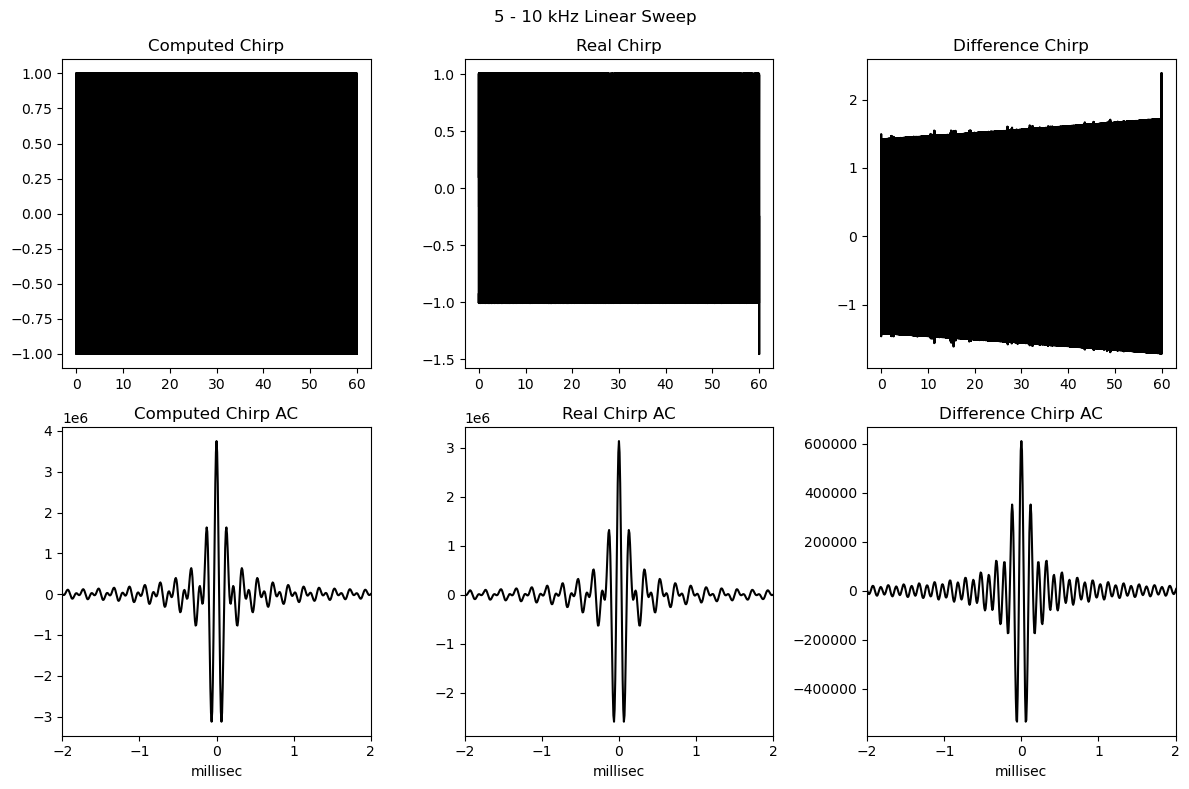

In [18]:
fig,axs = plt.subplots(2,3,figsize=[12,8])

# My chirp
axs[0,0].plot(t_axis, chirp,'k')
axs[1,0].plot(1e3 * np.hstack([-1*np.flipud(t_axis[1:]),t_axis]),autocorr,'k')


# Chunhongs chirp
axs[0,1].plot(t_axis, ch_resmp,'k')
axs[1,1].plot(1e3 * np.hstack([-1*np.flipud(t_axis[1:]),t_axis]),ch_rsmp_autocorr,'k')

# Difference
axs[0,2].plot(t_axis, chirp-ch_resmp,'k')
axs[1,2].plot(1e3 * np.hstack([-1*np.flipud(t_axis[1:]),t_axis]), (autocorr-ch_rsmp_autocorr),'k')

for ax in axs[1]:ax.set_xlim([-2,2]), ax.set_xlabel('millisec')
    
axs[1,1].set_xlabel('millisec')
axs[0,0].set_title('Computed Chirp')
axs[1,0].set_title('Computed Chirp AC')
axs[0,1].set_title('Real Chirp')
axs[1,1].set_title('Real Chirp AC')
axs[0,2].set_title('Difference Chirp')
axs[1,2].set_title('Difference Chirp AC')

fig.suptitle('5 - 10 kHz Linear Sweep')
fig.tight_layout()

In [19]:
# Correlate
Xcorr = scipy.signal.correlate(w2_data.copy(), chirp, mode='same')
ch_Xcorr = scipy.signal.correlate(w2_data.copy(), ch_resmp, mode='same')

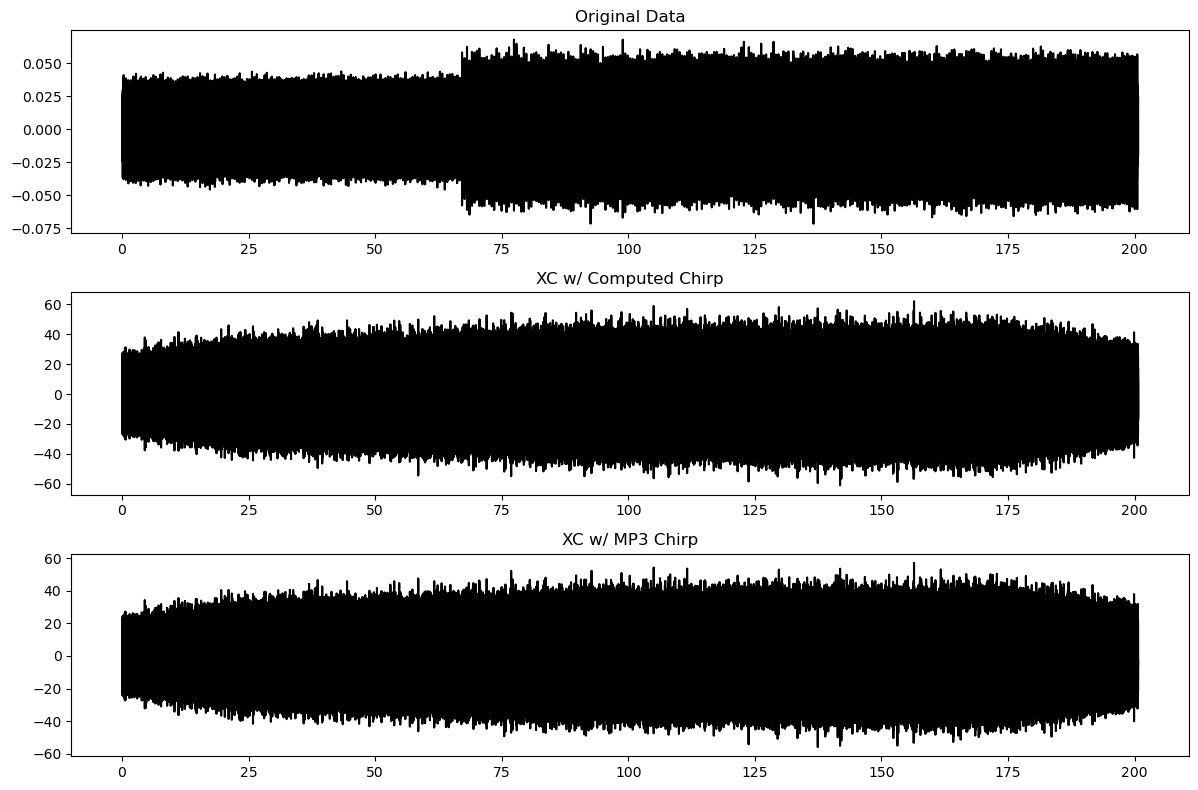

In [20]:
fig,axs = plt.subplots(3,1,figsize=[12,8])

axs[0].plot(t,w2_data, 'k')
axs[1].plot(t,Xcorr, 'k')
axs[2].plot(t,ch_Xcorr, 'k')

axs[0].set_title('Original Data')
axs[1].set_title('XC w/ Computed Chirp')
axs[2].set_title('XC w/ MP3 Chirp')

fig.tight_layout()

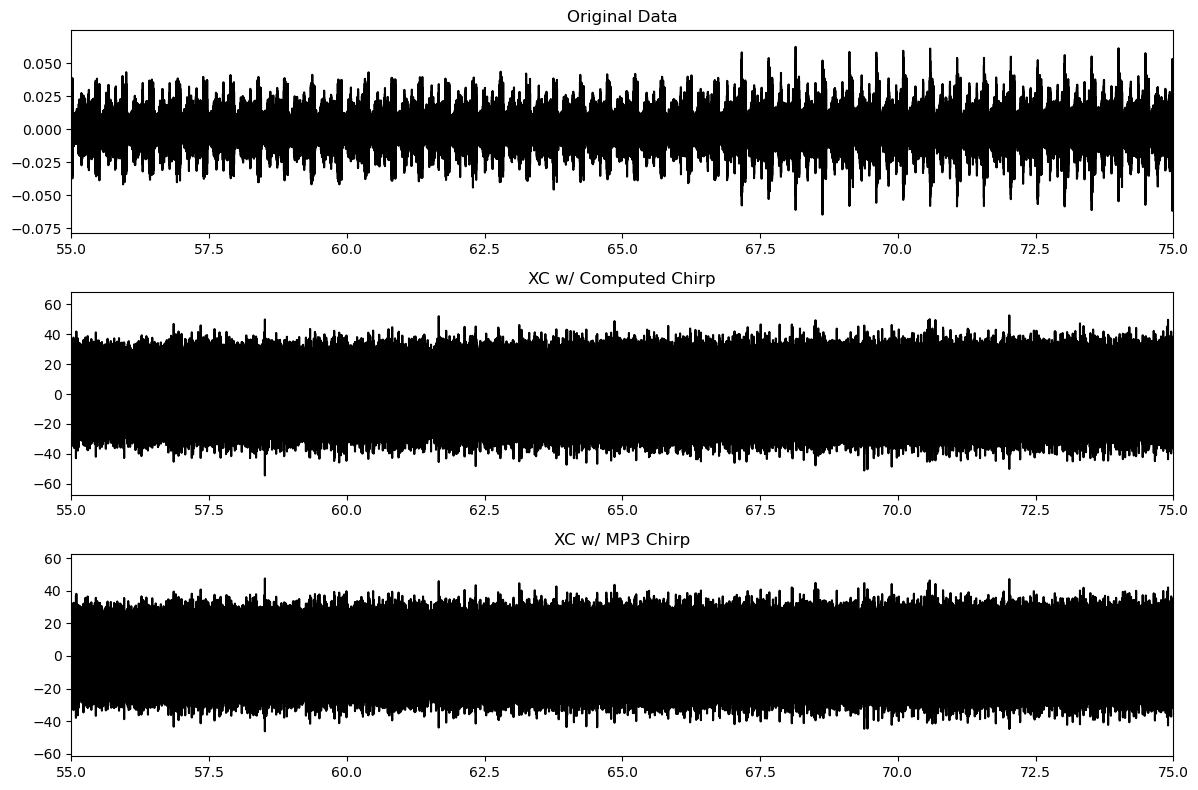

In [21]:
fig,axs = plt.subplots(3,1,figsize=[12,8])

axs[0].plot(t,w2_data, 'k')
axs[1].plot(t,Xcorr, 'k')
axs[2].plot(t,ch_Xcorr, 'k')

axs[0].set_title('Original Data')
axs[1].set_title('XC w/ Computed Chirp')
axs[2].set_title('XC w/ MP3 Chirp')

for ax in axs:ax.set_xlim([55,75])
    
fig.tight_layout()

# Synth example

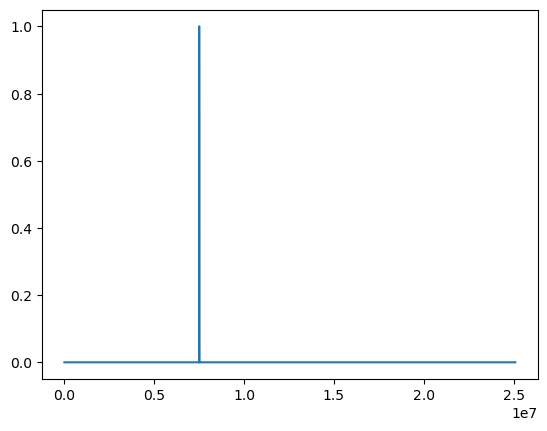

In [22]:
synth_data = np.zeros([len(w1_data)])
synth_data[int(60*fs)] = 1

plt.plot(synth_data)



In [ ]:
cnv_data = np.convolve(chirp,synth_data, mode='same')